In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from re import search
from wordcloud import WordCloud

In [2]:
import seaborn as sns
import re
import string
import itertools
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [3]:
df=pd.read_csv('fake_news.csv')

In [4]:
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [5]:
X=df.drop('label',axis=1)

In [6]:
X.head()


,Unnamed: 0,id,headline,written_by,news
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo..."
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ..."
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g..."
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...


In [7]:

## Get the Dependent features
y=df['label']


In [8]:
y.head()


0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

# Clean the Data

In [9]:
# Check for missing data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [11]:
df.drop(columns = ['Unnamed: 0','id','written_by'], inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  20242 non-null  object
 1   news      20761 non-null  object
 2   label     20800 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 487.6+ KB


In [13]:
# Dropping the rows which have null values
df.dropna(subset = ['headline', 'news'], how = 'any', inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20203 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  20203 non-null  object
 1   news      20203 non-null  object
 2   label     20203 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 631.3+ KB


In [15]:
df.reset_index(inplace = True)

In [16]:
# Check for placeholder values and duplicates

In [17]:
title_value_counts = df.headline.value_counts()

In [18]:
title_value_counts[title_value_counts > 1]

The Dark Agenda Behind Globalism And Open Borders                                                                            5
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence                           5
The Fix Is In: NBC Affiliate Accidentally Posts Election Results A Week Early: Hillary Wins Presidency 42% to Trump’s 40%    4
Let’s Be Clear – A Vote For Warmonger Hillary Clinton Is A Vote For World War 3                                              4
If Hillary Clinton Is Charged With Obstruction Of Justice She Could Go To Prison For 20 Years                                4
                                                                                                                            ..
The Elite Have Hung Hillary Out to Dry? This Is a Short-Lived Victory by the People                                          2
These New Solar Panels Use Sunlight to Create Clean Drinking Water from the Air                                

In [19]:
df[df.headline == 'The Dark Agenda Behind Globalism And Open Borders']


,index,headline,news,label
2433,2493,The Dark Agenda Behind Globalism And Open Borders,The Dark Agenda Behind Globalism And Open Bord...,1
6143,6314,The Dark Agenda Behind Globalism And Open Borders,"Date: October 28, 2016 in: Global Bankster Tak...",1
12871,13239,The Dark Agenda Behind Globalism And Open Borders,Alt-Market – by Brandon Smith \nWhen people un...,1
17104,17603,The Dark Agenda Behind Globalism And Open Borders,The Dark Agenda Behind Globalism And Open Bord...,1
18247,18783,The Dark Agenda Behind Globalism And Open Borders,Leave a reply \nBrandon Smith – When people un...,1


In [20]:
df.iloc[2493].news

'Bruce Springsteen blasts President Donald Trump as a “con man” and calls his administration “crooks” in a new protest song released this week. [“That’s What Makes Us Great” is a joint effort between The Boss and frequent collaborator Joe Grushecky and the Houserockers.  “Don’t tell me a   And sell it as a   I’ve been down that road   And I ain’t going back,” Springsteen sings on the track, which was released Wednesday morning on Grushecky’s website. “Don’t you brag to   That you never read a   I never put my   In a con man and his crooks,” the song continues. Grushecky  —   whose 1995 album American Babylon was produced by Springsteen  —   told the Pittsburgh   that he’d written the song before the Boss got involved. Springsteen reportedly sent his part to the   musician over the Internet. “I had this song, and Bruce and I had been talking. I sent it to him and he liked it,” Grushecky told the paper. “I said, ‘What do you think about singing on it?’ He gave it the Bruce treatment. ” S

In [21]:
df.iloc[17603].news

'WASHINGTON  —   Hillary Clinton assailed Donald J. Trump on Friday as untrustworthy on women’s issues, sharpening her tone against him in her first major speech since becoming the presumptive Democratic presidential nominee. Finally free to focus on the general election, Mrs. Clinton signaled that she planned to hit her likely Republican opponent in an area of perceived weakness while working to mend fissures within her own party by focusing on issues dear to progressives, such as protecting abortion rights and funding for Planned Parenthood. “When Donald Trump says, ‘Let’s make America great again,’ that is code for let’s take America backward,” Mrs. Clinton said at a Planned Parenthood Action Fund event in Washington. In a   speech, Mrs. Clinton seized on Mr. Trump’s suggestion in March that abortion be banned and that women who violate such a ban face punishment. Although he later retracted the remark amid a bipartisan backlash, Mrs. Clinton made clear that she would not let it go.

In [22]:
# Next I'll make a dataframe with all the data with duplicate titles

In [23]:
duplicate_title_list = set(title_value_counts[title_value_counts > 1].keys())

In [24]:
df_dup_titles = df[df.headline.isin(duplicate_title_list)]
df_dup_titles

,index,headline,news,label
15,17,Millions of South Koreans Rise Up Against Shad...,Your News Wire \nSouth Koreans are rising up i...,1
44,47,Las imágenes libres de derechos más destacadas...,Las imágenes libres de derechos más destacadas...,1
62,66,Young patient,Anatomy lesson Published: 12 mins ago \nEditor...,1
74,79,Thomas Frank Explores Whether Hillary Clinton ...,,1
79,84,Russia is Hoarding Gold at an Alarming Rate — ...,Home / Be The Change / Antiwar / Russia is Hoa...,1
...,...,...,...,...
20042,20633,WHO cancer agency under fire for withholding ‘...,The International Agency for Research on Cance...,1
20084,20677,"Rigged Primary, Media, and Candidate; the Amer...",Email \n\nThe excitement over the US election ...,1
20123,20717,Jeddah airport was targeted by Ansar Allah mis...,Email \n\nAn informed source in Yemen's AnsarA...,1
20157,20753,Las imágenes libres de derechos más destacadas...,Las imágenes libres de derechos más destacadas...,1


In [25]:
df_dup_titles[df_dup_titles.duplicated()]

,index,headline,news,label


There are 70 duplicate rows that will need to be deleted.

Check for rows with duplicate news

In [26]:
df_dup_titles[df_dup_titles.duplicated(['news'])]

,index,headline,news,label
1775,1818,JASON CHAFFETZ EXPOSED HILLARY CLINTON’S PLAN ...,The Corruption of the Clinton’s is like an end...,1
4890,5016,"The U.S./Turkey Plan For “Seizing, Holding, An...",By Brandon Turbeville As the U.S. Presidential...,1
4977,5110,19 men cry rape by Iran's top Quran reader,"Print Saeed Toosi, right, and Ayatollah Khamen...",1
5143,5284,North Korea Threatens ‘Sacred’ Nuclear War Aga...,Email \nNorth Korea’s Foreign Ministry slammed...,1
5247,5390,"FEAR OF TRUMP: BUSH, OBAMA, CLINTON ALL BUYING...",Email \n\nIt appears Bill and Hillary Clinton ...,1
...,...,...,...,...
19386,19953,War Less Imminent After Clinton Defeat,2016 presidential campaign A Black Agenda Radi...,1
19802,20385,Donald J. Trump’s 10 Point Plan to Put America...,Tweet Widget by Tanya Golash-Boza \nHow will D...,1
19990,20580,Rand Paul: Polls Showing Hillary Ahead Are ‘De...,Email \n\nWednesday on 800 WVHU radio’s “The T...,1
20084,20677,"Rigged Primary, Media, and Candidate; the Amer...",Email \n\nThe excitement over the US election ...,1


Check for rows that have duplicate headline and news

In [27]:
df_dup_titles[df_dup_titles.duplicated(['headline', 'news'])]


,index,headline,news,label
1775,1818,JASON CHAFFETZ EXPOSED HILLARY CLINTON’S PLAN ...,The Corruption of the Clinton’s is like an end...,1
4890,5016,"The U.S./Turkey Plan For “Seizing, Holding, An...",By Brandon Turbeville As the U.S. Presidential...,1
4977,5110,19 men cry rape by Iran's top Quran reader,"Print Saeed Toosi, right, and Ayatollah Khamen...",1
5143,5284,North Korea Threatens ‘Sacred’ Nuclear War Aga...,Email \nNorth Korea’s Foreign Ministry slammed...,1
5247,5390,"FEAR OF TRUMP: BUSH, OBAMA, CLINTON ALL BUYING...",Email \n\nIt appears Bill and Hillary Clinton ...,1
...,...,...,...,...
19386,19953,War Less Imminent After Clinton Defeat,2016 presidential campaign A Black Agenda Radi...,1
19802,20385,Donald J. Trump’s 10 Point Plan to Put America...,Tweet Widget by Tanya Golash-Boza \nHow will D...,1
19990,20580,Rand Paul: Polls Showing Hillary Ahead Are ‘De...,Email \n\nWednesday on 800 WVHU radio’s “The T...,1
20084,20677,"Rigged Primary, Media, and Candidate; the Amer...",Email \n\nThe excitement over the US election ...,1


In [28]:
df_dup_titles[df_dup_titles.news == ' ']

,index,headline,news,label
74,79,Thomas Frank Explores Whether Hillary Clinton ...,,1
11256,11572,More on Trump’s Populism and How It Can Be Con...,,1
14860,15286,Thomas Frank Explores Whether Hillary Clinton ...,,1
16962,17458,More on Trump’s Populism and How It Can Be Con...,,1


The use of a duplicate headline seems to be a common practice and some articles seem to be revisions. A duplicate headline will be considered ok, but the duplicate rows and rows with duplicate news for the story will need removed. Rows without news will also need to be removed.

In [29]:
# Check for a text value with one space
df[df.news == ' ']

,index,headline,news,label
74,79,Thomas Frank Explores Whether Hillary Clinton ...,,1
203,210,Hillary is Sick & Tired of Suffering from Wein...,,1
264,271,A Connecticut Reader Reports Record Voter Regi...,,1
461,472,Not sure what to do with your time now Bake Of...,,1
1539,1573,Citizens Reject Forced Diversity Policy by Sup...,,1
...,...,...,...,...
19314,19880,"Yes, Virginia (Dare), There ARE Righteous Jews...",,1
19657,20232,Trump’s Closing Argument,,1
19955,20543,Is your promising internet career over now Vin...,,1
19970,20559,YIKES! HILLARY GOES OFF THE RAILS…Pulls A Howa...,,1


There could be an arbritray amount of whitespace so I will replace all news values that are only whitespace with Nan

In [30]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [31]:
df.isna().sum()

index        0
headline     0
news        77
label        0
dtype: int64

# Remove Duplicate Data

In [32]:
len(df)

20203

In [33]:
df_clean = df.drop_duplicates(ignore_index=True)

In [34]:
len(df_clean)

20203

In [35]:
# Drop Rows with same title and text (keeping the first instance)
df_clean = df_clean.drop_duplicates(['headline', 'news'], ignore_index=True)

In [36]:
len(df_clean)

20133

In [37]:
# Drop Rows with the same text (keeping the first instance)
df_clean = df_clean.drop_duplicates(['news'], ignore_index=True)

In [38]:
len(df_clean)

19866

In [39]:
df_clean.dropna(subset = ['news'], how = 'any', inplace = True)

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19865 entries, 0 to 19865
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     19865 non-null  int64 
 1   headline  19865 non-null  object
 2   news      19865 non-null  object
 3   label     19865 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 776.0+ KB


In [41]:
len(df) - len(df_clean)

338

In [42]:
df_clean.head()

,index,headline,news,label
0,0,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1


# Explore the dataset

In [43]:
def show_hist_for_col(df, column, headline):
    """
    Display a histogram for a column in a dataframe, splitting the data by label.
    """
    plt.figure(figsize=(16,8))
    df[df.label == 0][column].hist(label='True')
    df[df.label == 1][column].hist(alpha=0.4, label='Fake')
    plt.title(headline)
    plt.legend()
    plt.show()

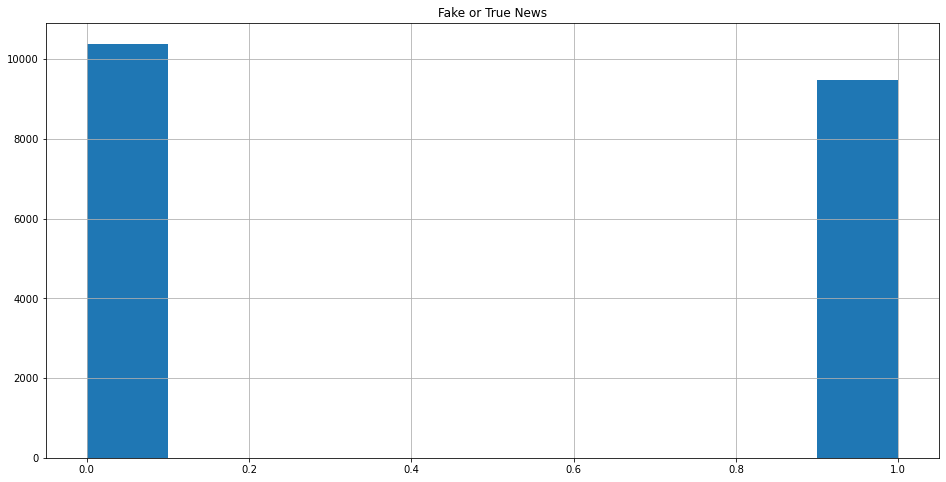

In [44]:
plt.figure(figsize=(16,8))
df_clean.label.hist()
plt.title('Fake or True News')
plt.show()

After cleaning the data it has become more imbalanced, but it is not significant so hopefully it will not have a major impact on models.

In [45]:
# Length of Titles

In [46]:
df_clean['headline_len'] = df_clean.headline.apply(len)

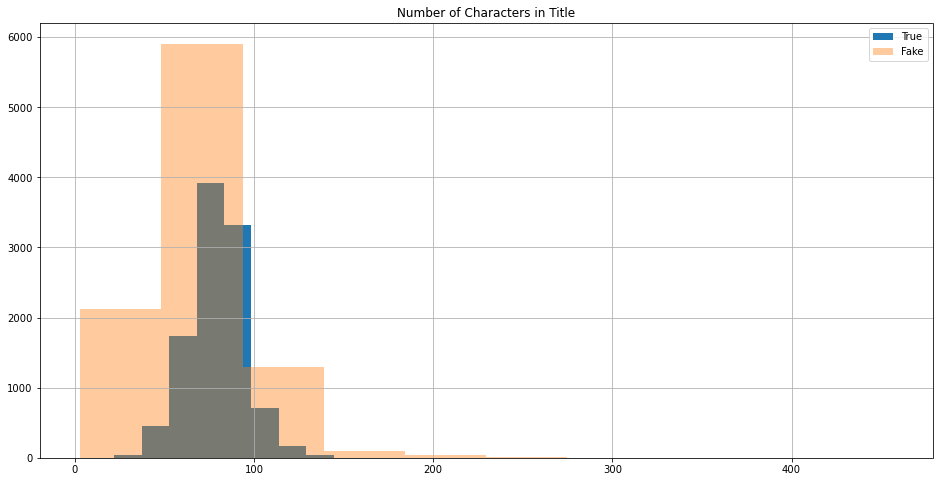

In [47]:
show_hist_for_col(df_clean, 'headline_len', 'Number of Characters in Title')

In [48]:
df_clean[df_clean.label == 0].headline_len.describe()

count    10387.000000
mean        79.594974
std         15.568225
min         22.000000
25%         70.000000
50%         81.000000
75%         89.000000
max        175.000000
Name: headline_len, dtype: float64

In [49]:
df_clean[df_clean.label == 1].headline_len.describe()

count    9478.000000
mean       68.609200
std        27.971262
min         3.000000
25%        50.000000
50%        67.000000
75%        83.000000
max       456.000000
Name: headline_len, dtype: float64

Fake news stories have a wider range in the length of headline than True

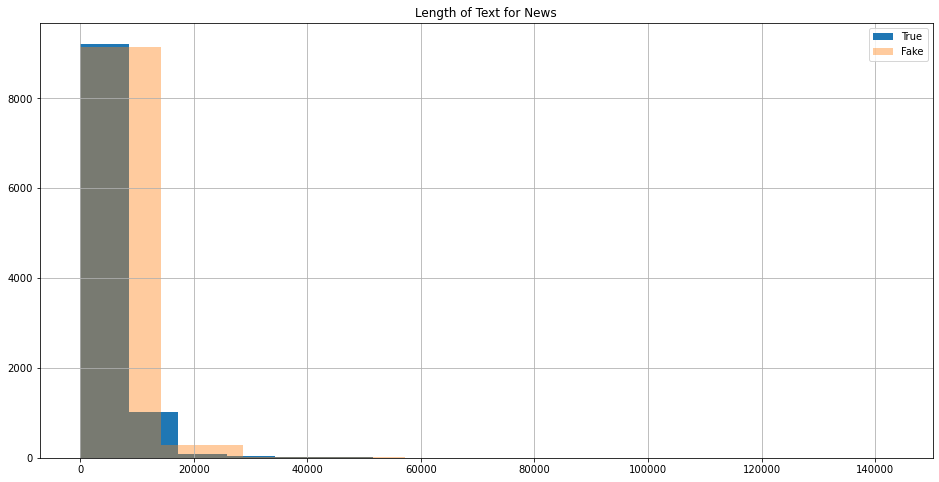

In [50]:
# length of news text
df_clean['text_len'] = df_clean.news.apply(len)
show_hist_for_col(df_clean, 'text_len', 'Length of Text for News')

In [51]:
df_clean.head(10)

,index,headline,news,label,headline_len,text_len
0,0,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,84,7936
1,1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0,72,6112
2,2,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0,100,425
3,3,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0,100,6516
4,4,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1,28,9164
5,5,Whatever the Outcome on November 8th the US Wi...,Taming the corporate media beast Whatever the ...,1,106,15285
6,6,Rapid Evolution Saved This Fish From Pollution...,The State of New Jersey says you can’t eat the...,0,79,4159
7,7,Alabama Prison Officials Retaliate Against Pri...,Advocates say prison officials at the Kilby Co...,1,88,6311
8,9,Can We Live in a Constant State of Love?,Leave a reply \nToni Emerson – When we fall in...,1,40,6386
9,10,Is Hillary a Closet Drunk… New WikiLeak Email ...,BREAKING: Clinton Fixer Reveals Sick Smear Hil...,1,93,1664


In [52]:
## Text cleaning

class TextCleaningUtils:
    '''
        This class contains implementations of various text cleaning operations (Static Methods)
    '''
    @staticmethod
    def expand_abbreviations(text):
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"there's", "there is", text)
        text = re.sub(r"We're", "We are", text)
        text = re.sub(r"That's", "That is", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"they're", "they are", text)
        text = re.sub(r"Can't", "Cannot", text)
        text = re.sub(r"wasn't", "was not", text)
        text = re.sub(r"don\x89Ûªt", "do not", text)
        text= re.sub(r"aren't", "are not", text)
        text = re.sub(r"isn't", "is not", text)
        text = re.sub(r"What's", "What is", text)
        text = re.sub(r"haven't", "have not", text)
        text = re.sub(r"hasn't", "has not", text)
        text = re.sub(r"There's", "There is", text)
        text = re.sub(r"He's", "He is", text)
        text = re.sub(r"It's", "It is", text)
        text = re.sub(r"You're", "You are", text)
        text = re.sub(r"I'M", "I am", text)
        text = re.sub(r"shouldn't", "should not", text)
        text = re.sub(r"wouldn't", "would not", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"i'm", "I am", text)
        text = re.sub(r"I\x89Ûªm", "I am", text)
        text = re.sub(r"I'm", "I am", text)
        text = re.sub(r"Isn't", "is not", text)
        text = re.sub(r"Here's", "Here is", text)
        text = re.sub(r"you've", "you have", text)
        text = re.sub(r"you\x89Ûªve", "you have", text)
        text = re.sub(r"we're", "we are", text)
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"we've", "we have", text)
        text = re.sub(r"it\x89Ûªs", "it is", text)
        text = re.sub(r"doesn\x89Ûªt", "does not", text)
        text = re.sub(r"It\x89Ûªs", "It is", text)
        text = re.sub(r"Here\x89Ûªs", "Here is", text)
        text = re.sub(r"who's", "who is", text)
        text = re.sub(r"I\x89Ûªve", "I have", text)
        text = re.sub(r"y'all", "you all", text)
        text = re.sub(r"can\x89Ûªt", "cannot", text)
        text = re.sub(r"would've", "would have", text)
        text = re.sub(r"it'll", "it will", text)
        text = re.sub(r"we'll", "we will", text)
        text = re.sub(r"wouldn\x89Ûªt", "would not", text)
        text = re.sub(r"We've", "We have", text)
        text = re.sub(r"he'll", "he will", text)
        text = re.sub(r"Y'all", "You all", text)
        text = re.sub(r"Weren't", "Were not", text)
        text = re.sub(r"Didn't", "Did not", text)
        text = re.sub(r"they'll", "they will", text)
        text = re.sub(r"DON'T", "DO NOT", text)
        text = re.sub(r"That\x89Ûªs", "That is", text)
        text = re.sub(r"they've", "they have", text)
        text = re.sub(r"they'd", "they would", text)
        text = re.sub(r"i'd", "I would", text)
        text = re.sub(r"should've", "should have", text)
        text = re.sub(r"You\x89Ûªre", "You are", text)
        text = re.sub(r"where's", "where is", text)
        text = re.sub(r"Don\x89Ûªt", "Do not", text)
        text = re.sub(r"i'll", "I will", text)
        text = re.sub(r"weren't", "were not", text)
        text = re.sub(r"They're", "They are", text)
        text = re.sub(r"Can\x89Ûªt", "Cannot", text)
        text = re.sub(r"you\x89Ûªll", "you will", text)
        text = re.sub(r"I\x89Ûªd", "I would", text)
        text = re.sub(r"let's", "let us", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"can't", "cannot", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"you're", "you are", text)
        text = re.sub(r"i've", "I have", text)
        text = re.sub(r"that's", "that is", text)
        text = re.sub(r"i'll", "I will", text)
        text = re.sub(r"doesn't", "does not",text)
        text = re.sub(r"i'd", "I would", text)
        text = re.sub(r"didn't", "did not", text)
        text = re.sub(r"ain't", "am not", text)
        text = re.sub(r"you'll", "you will", text)
        text = re.sub(r"I've", "I have", text)
        text = re.sub(r"Don't", "do not", text)
        text = re.sub(r"I'll", "I will", text)
        text = re.sub(r"I'LL", "I will", text)
        text = re.sub(r"I'd", "I would", text)
        text = re.sub(r"Let's", "Let us", text)
        text = re.sub(r"you'd", "You would", text)
        text = re.sub(r"It's", "It is", text)
        text = re.sub(r"Ain't", "am not", text)
        text = re.sub(r"Haven't", "Have not", text)
        text = re.sub(r"Hadn't", "Had not", text)
        text = re.sub(r"Could've", "Could have", text)
        text = re.sub(r"youve", "you have", text)  
        text = re.sub(r"donå«t", "do not", text)  

        return text

    cleaning_regex_map = {
        'web_links': r'(?i)(?:(?:http(?:s)?:)|(?:www\.))\S+',
        'email': r'[\w.]+@\w+\.[a-z]{3}',
        'twitter_handles': r'[#@]\S+',
        'redundant_newlines': r'[\r|\n|\r\n]+',
        'redundant_spaces': r'\s\s+',
        'punctuations': r'[\.,!?;:]+',
#         'special_chars': r'[^a-zA-Z0-9\s\.,!?;:]+',
        'special_chars': r'[^a-zA-Z\s\.,!?;:]+'  ## removing nums
        
    }
    
    @staticmethod
    def clean_text_from_regex(text, text_clean_regex):
        '''
            Follow a particular cleaning expression, provided
            as an input by an user to clean the text.
        '''

        text = text_clean_regex.sub(' ', text).strip()
        return text
    
    @staticmethod
    def strip_html(text):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()
    
    @staticmethod
    def remove_web_links(text):
        '''
            Removes any web link that follows a particular default expression,
            present in the text.
        '''

        web_links_regex = re.compile(TextCleaningUtils.cleaning_regex_map['web_links'])
        text = TextCleaningUtils.clean_text_from_regex(text, web_links_regex)
        return text
    
    @staticmethod
    def remove_email_addresses(text):
        '''
            Removes email addresses present in the text.
        '''

        email_regex = re.compile(TextCleaningUtils.cleaning_regex_map['email'])
        text = TextCleaningUtils.clean_text_from_regex(text, email_regex)
        return text
    
    @staticmethod
    def remove_twitter_handles(text):
        '''
            Removes any twitter handle present in the text.
        '''

        twitter_handles_regex = re.compile(TextCleaningUtils.cleaning_regex_map['twitter_handles'])
        text = TextCleaningUtils.clean_text_from_regex(text, twitter_handles_regex)
        return text
    
    @staticmethod
    def remove_emojis(text):
        emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text=emoji_clean.sub(r'',text)
        url_clean= re.compile(r"https://\S+|www\.\S+")
        text=url_clean.sub(r'',text)
        return text
    
    @staticmethod
    def remove_redundant_newlines(text):
        '''
            Removes any redundant new line present in the text.
        '''

        redundant_newlines_regex = re.compile(
            TextCleaningUtils.cleaning_regex_map['redundant_newlines'])
        text = TextCleaningUtils.clean_text_from_regex(text, redundant_newlines_regex)
        return text
    
    @staticmethod
    def remove_redundant_spaces(text):
        '''
            Remove any redundant space provided as default,
            that is present in the text.
        '''

        redundant_spaces_regex = re.compile(
            TextCleaningUtils.cleaning_regex_map['redundant_spaces'])
        text = TextCleaningUtils.clean_text_from_regex(text, redundant_spaces_regex)
        return text
    
    @staticmethod
    def remove_punctuations(text):
        '''
            Removes any punctuation that follows the default expression, in the text.
        '''

        remove_punctuations_regex = re.compile(TextCleaningUtils.cleaning_regex_map['punctuations'])
        text = TextCleaningUtils.clean_text_from_regex(text, remove_punctuations_regex)
        return text

    @staticmethod
    def remove_special_chars(text):
        '''
            Replace any special character provided as default,
            which is present in the text with space
        '''

        special_chars_regex = re.compile(TextCleaningUtils.cleaning_regex_map['special_chars'])
        text = TextCleaningUtils.clean_text_from_regex(text, special_chars_regex)
        return text

    @staticmethod
    def remove_exaggerated_words(text):
        '''
            Removes any exaggerated word present in the text.
        '''

        return ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))

    @staticmethod
    def replace_multiple_chars(text):
        '''
            Replaces multiple characters present in the text.
        '''

        char_list = ['.', '?', '!', '#', '$', '/', '@', '*', '(', ')', '+']
        final_text = ''
        for i in char_list:
            if i in text:
                pattern = "\\" + i + '{2,}'
                repl_str = i.replace("\\", "")
                text = re.sub(pattern, repl_str, text)
                final_text = ' '.join(text.split())
        return final_text

    @staticmethod
    def replace_sign(text):
        '''
            Replaces any sign with words like & with 'and', in the text.
        '''
        sign_list = {'&': ' and ', '/': ' or ', '\xa0': ' '}
        final_text = ''
        for i in sign_list:
            if i in text:
                text = re.sub(i, sign_list[i], text)
                final_text = ' '.join(text.split())
        return final_text

    @staticmethod
    def remove_accented_char(text):
        text = unicodedata.normalize('NFD', text) \
            .encode('ascii', 'ignore') \
            .decode("utf-8")
        return str(text)

    @staticmethod
    def replace_characters(text, replace_map):
        '''
            Replaces any character custom provided by an user.
        '''

        for char, replace_val in replace_map.items():
            text = text.replace(char, replace_val)
        return text
    
def clean_data(df,col_to_clean):
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_web_links)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_email_addresses)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_twitter_handles)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.expand_abbreviations)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_emojis)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_special_chars)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_redundant_spaces)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_punctuations)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_exaggerated_words)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_redundant_newlines)
    df[col_to_clean] = df[col_to_clean].astype(str)
    df[col_to_clean] = df[col_to_clean].str.lower()
    
    return df

In [53]:
df_clean = clean_data(df_clean, 'news')

In [54]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [55]:
nltk.download('stopwords')

sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(df_clean['news'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
 
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in sw)
    preprocessed_reviews.append(sentance.strip())

100%|███████████████████████████████████████████████████████████████████████████| 19865/19865 [00:56<00:00, 350.74it/s]


In [57]:
stop_words = stopwords.words("english")

flat_list_news_summaries_no_stop = [word for word in preprocessed_reviews if word not in stop_words]

In [61]:
from wordcloud import WordCloud, STOPWORDS

In [63]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_clean[df_clean['label']==1].news: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in df_clean[df_clean['label']==0].news: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

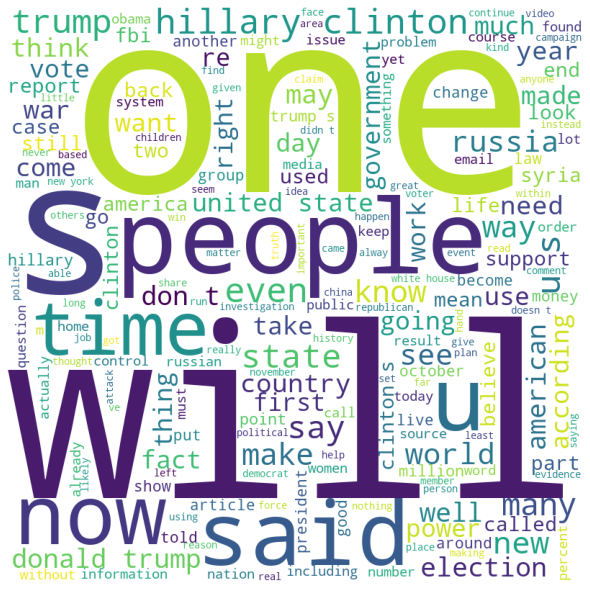

In [64]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(real_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [65]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(preprocessed_reviews).toarray()

In [66]:
X.shape


(19865, 5000)

In [67]:
y=df_clean['label']


In [68]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [69]:
tfidf_v.get_feature_names()[:20]


['aaron',
 'abandoned',
 'abc',
 'abe',
 'abedin',
 'ability',
 'able',
 'abortion',
 'abroad',
 'absence',
 'absolute',
 'absolutely',
 'abu',
 'abuse',
 'academic',
 'academy',
 'accept',
 'acceptable',
 'accepted',
 'accepting']

In [70]:
tfidf_v.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [71]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [72]:
count_df.head()


,aaron,abandoned,abc,abe,abedin,ability,able,abortion,abroad,absence,...,young,young people,younger,youth,youtube,zero,zika,zone,zones,zu
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.033032,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.067749,0.0,0.0,0.0,0.0,...,0.019065,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.028210,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.038691,0.0,0.0,0.0


In [73]:
import matplotlib.pyplot as plt


In [74]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MultinomialNB 

In [75]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [76]:
from sklearn import metrics


accuracy:   0.889
Confusion matrix, without normalization


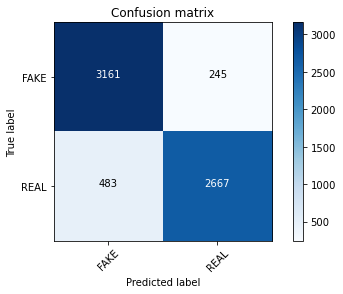

In [77]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# PassiveAggressiveClassifier

In [79]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.951
Confusion matrix, without normalization


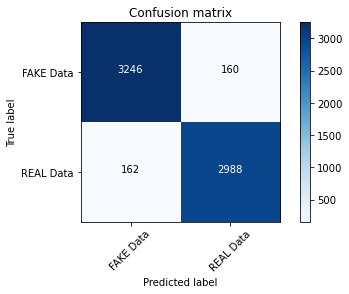

In [80]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)

C:\Users\Nikhil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:   0.952
Confusion matrix, without normalization


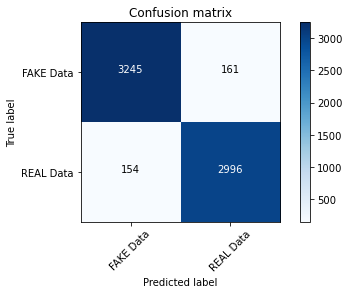

In [84]:
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

# MultinomialNB with hyperparameter tunning

In [85]:
classifier=MultinomialNB(alpha=0.1)

In [86]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Nikhil\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8913971934106162
Alpha: 0.1, Score : 0.8903294691885296
Alpha: 0.2, Score : 0.8900244051250763
Alpha: 0.30000000000000004, Score : 0.8898718730933496
Alpha: 0.4, Score : 0.8894142769981697
Alpha: 0.5, Score : 0.889261744966443
Alpha: 0.6000000000000001, Score : 0.8891092129347163
Alpha: 0.7000000000000001, Score : 0.8891092129347163
Alpha: 0.8, Score : 0.889261744966443
Alpha: 0.9, Score : 0.8891092129347163


In [90]:
## Get Features names
feature_names = tfidf_v.get_feature_names()

In [91]:
classifier.coef_[0]

array([-9.59951502, -9.39604393, -8.79033552, ..., -8.29924371,
       -9.33426075, -8.45635164])

In [92]:
### Most real word
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.37683103650725, 'clinton'),
 (-5.444735839356878, 'trump'),
 (-5.683975047629063, 'hillary'),
 (-5.862427540769164, 'us'),
 (-6.086491188383074, 'people'),
 (-6.103168951589102, 'election'),
 (-6.166793704050107, 'one'),
 (-6.244461752474542, 'would'),
 (-6.276051331833836, 'hillary clinton'),
 (-6.282242290984981, 'fbi'),
 (-6.3179890544307105, 'said'),
 (-6.341139487239225, 'russia'),
 (-6.374416446422491, 'world'),
 (-6.405025911159454, 'new'),
 (-6.41114475213113, 'like'),
 (-6.462240671216925, 'october'),
 (-6.468926078213362, 'state'),
 (-6.469393017837248, 'media'),
 (-6.486071637809418, 'war'),
 (-6.498258107722949, 'president')]

In [93]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-11.144588908572809, 'briefing posted'),
 (-11.144588908572809, 'gorsuch'),
 (-11.144588908572809, 'judge gorsuch'),
 (-11.144588908572809, 'mr bannon'),
 (-11.144588908572809, 'mr christie'),
 (-11.144588908572809, 'mr kushner'),
 (-11.144588908572809, 'mr sanders'),
 (-11.144588908572809, 'pruitt'),
 (-11.144588908572809, 'tillerson'),
 (-11.113652435638995, 'said ms'),
 (-11.067189812180672, 'mr ailes'),
 (-11.054764627477704, 'mr erdogan'),
 (-11.04471063051344, 'mr ryan'),
 (-11.03612743890834, 'devos'),
 (-11.020141969164285, 'like mr'),
 (-11.013162901741996, 'said mr trump'),
 (-10.984181268765482, 'twitter email'),
 (-10.98346510038746, 'mr pence'),
 (-10.969050221123164, 'mr assad'),
 (-10.948960784167456, 'time mr')]